<a href="https://colab.research.google.com/github/kessingtonosazee/GCP_Project_1/blob/master/aml_2324_w2_webinar_live.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## AML 23/24 Week 2: Webinar



In [ ]:
# latest version of sklearn (to have access to recent features)
!pip install --upgrade scikit-learn==1.4.0 -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 25.2 MB/s eta 0:00:00


In [ ]:
import sklearn
# this makes is easier for getting dataframes by default as input/output of
# sklearn pipelines
sklearn.set_config(transform_output="pandas")

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
sns.set(
    { "figure.figsize": (6, 4) },
    style='ticks',
    color_codes=True,
    font_scale=0.8
)
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV, ParameterGrid, RandomizedSearchCV

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression, Ridge

## EDA

* "Try out simple LinearRegression with and without polynomial and interaction features on a simple synthetic dataset that I have created for you. Similarly to what we did in the lecture and in previous classes, try to use sklearn transformers and pipelines, as well as cross-validation."

In [ ]:
synth_data = pd.read_csv('https://raw.githubusercontent.com/gerberl/6G7V0017-2324/main/datasets/poly-interact-synth-data.csv')

In [ ]:
synth_data.head()

,x1,x2,x3,y
0,1.764052,0.555963,-1.532921,32.453903
1,0.400157,0.892474,-1.711970,14.758467
2,0.978738,-0.422315,0.046135,5.225171
3,2.240893,0.104714,-0.958374,32.687982
4,1.867558,0.228053,-0.080812,24.122815


<Axes: xlabel='x1', ylabel='Count'>

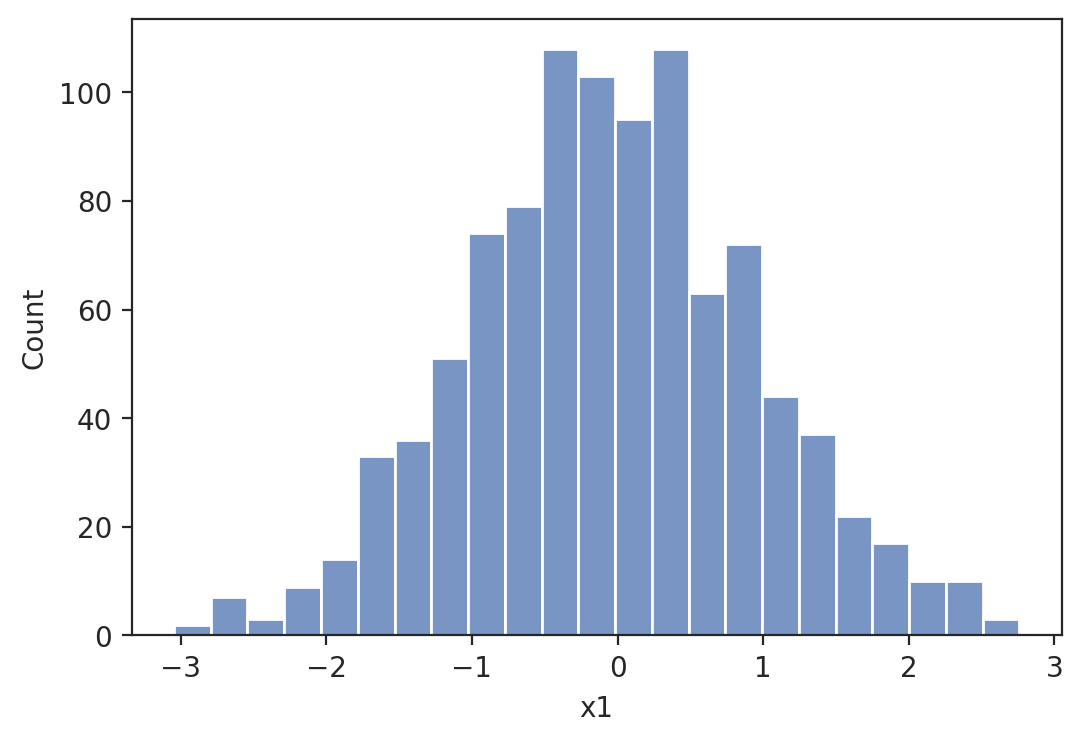

In [ ]:
sns.histplot(data=synth_data, x='x1')

<Axes: xlabel='x2', ylabel='Count'>

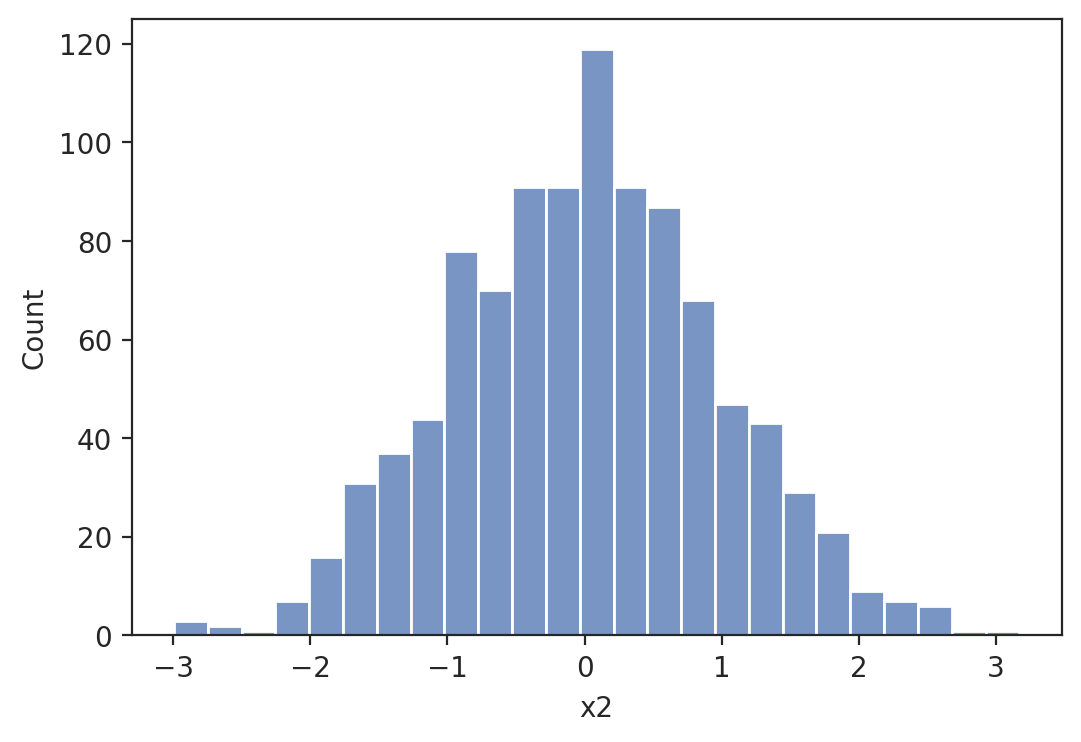

In [ ]:
sns.histplot(data=synth_data, x='x2')

<Axes: xlabel='x3', ylabel='Count'>

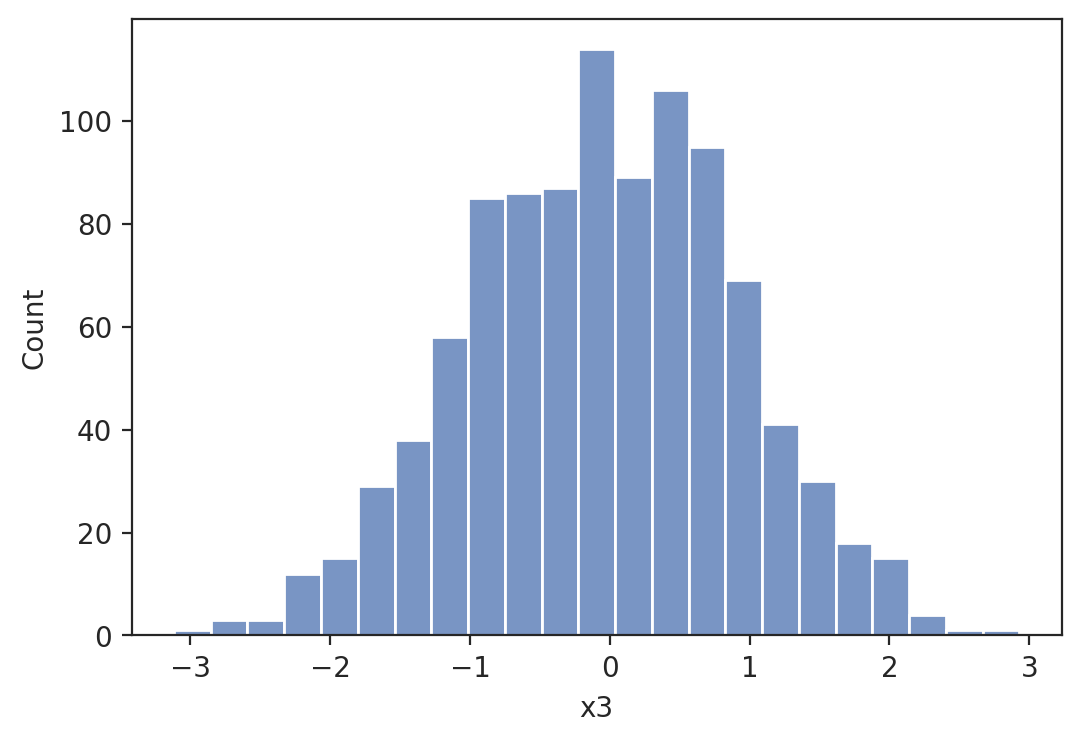

In [ ]:
sns.histplot(data=synth_data, x='x3')

<Axes: xlabel='y', ylabel='Count'>

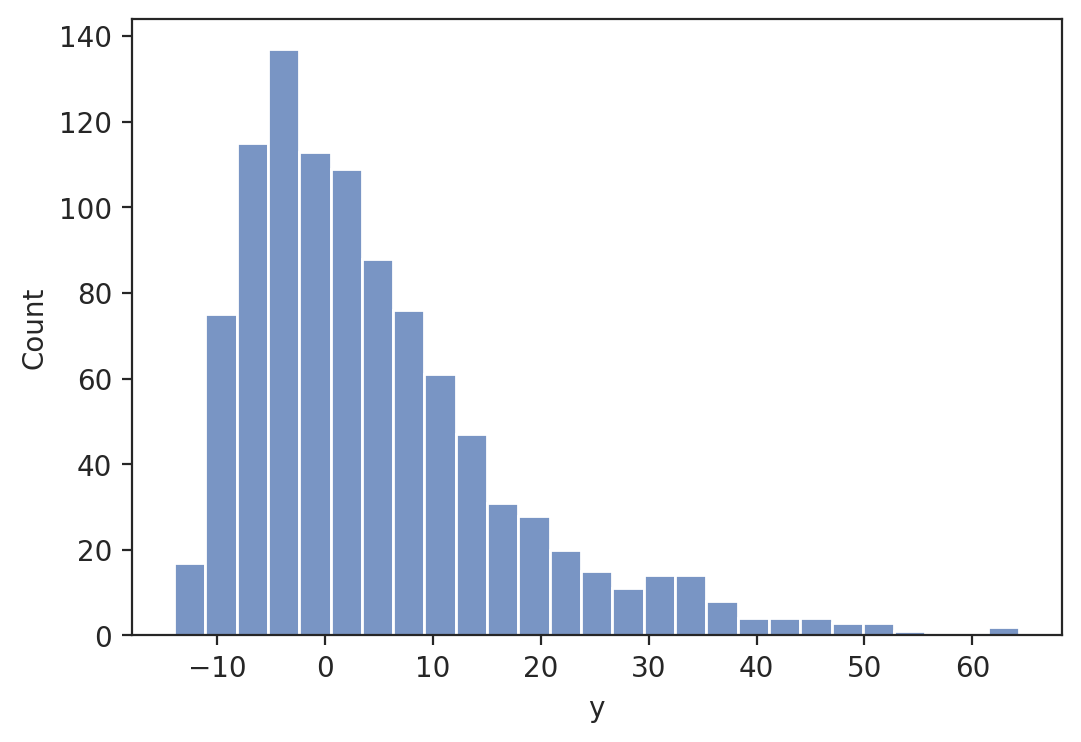

In [ ]:
sns.histplot(data=synth_data, x='y')

<Axes: xlabel='x1', ylabel='y'>

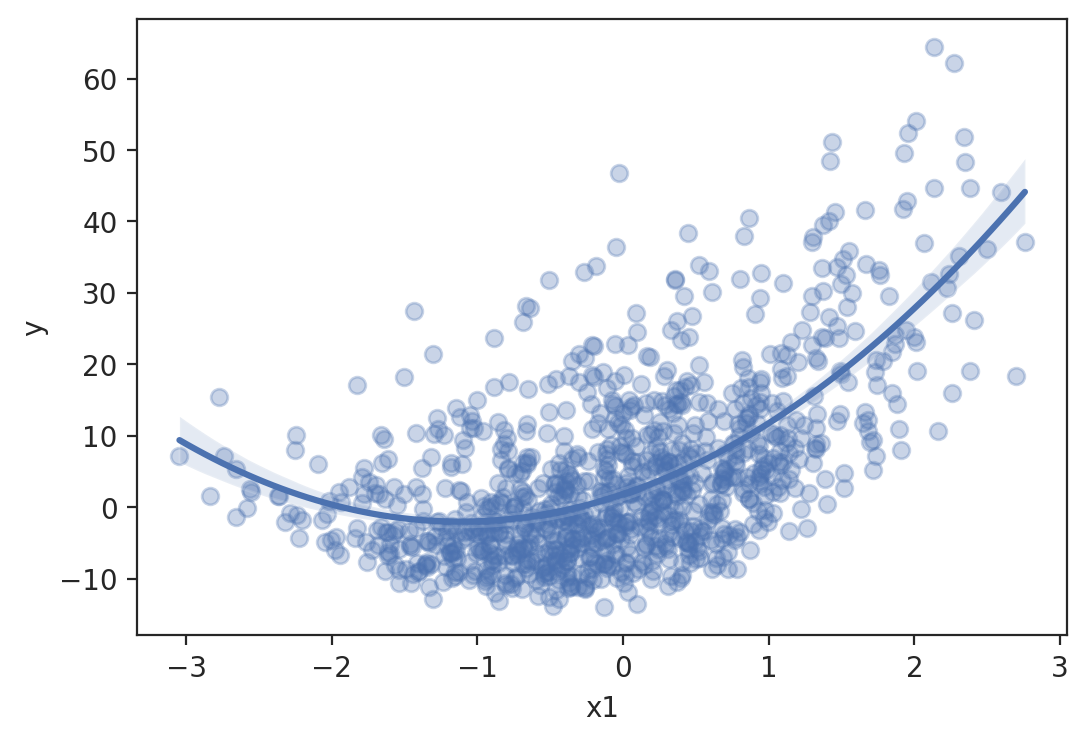

In [ ]:
sns.regplot(data=synth_data, x='x1', y='y', scatter_kws=dict(alpha=0.3), order=2);

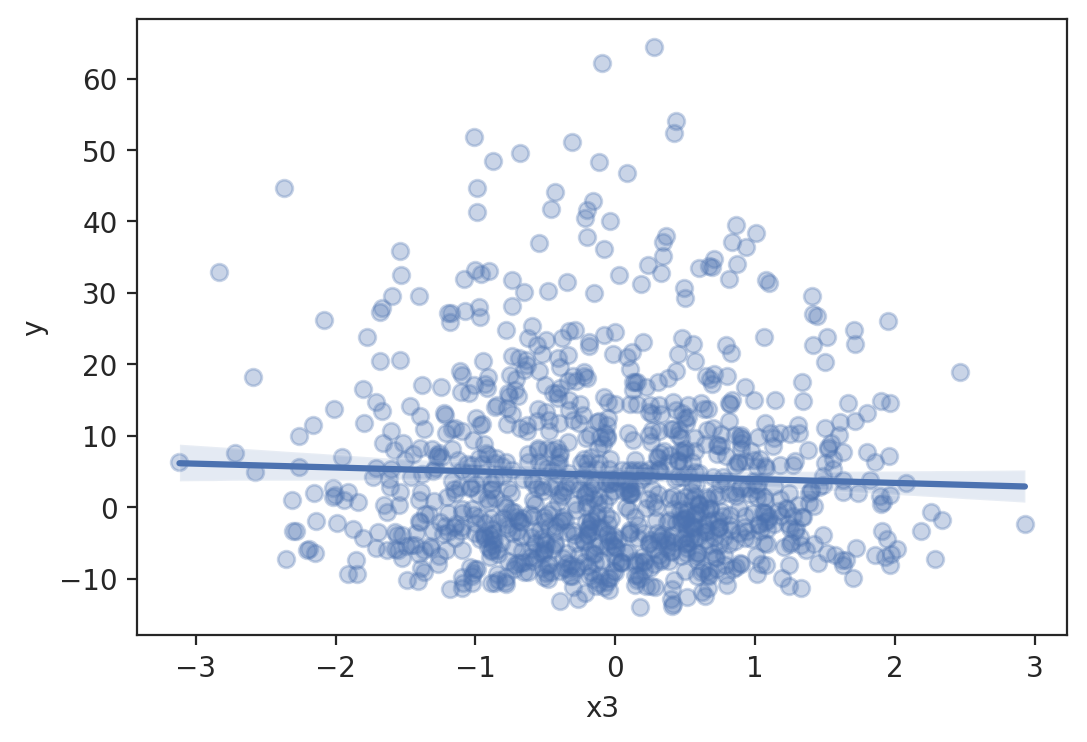

In [ ]:
sns.regplot(data=synth_data, x='x3', y='y', scatter_kws=dict(alpha=0.3));

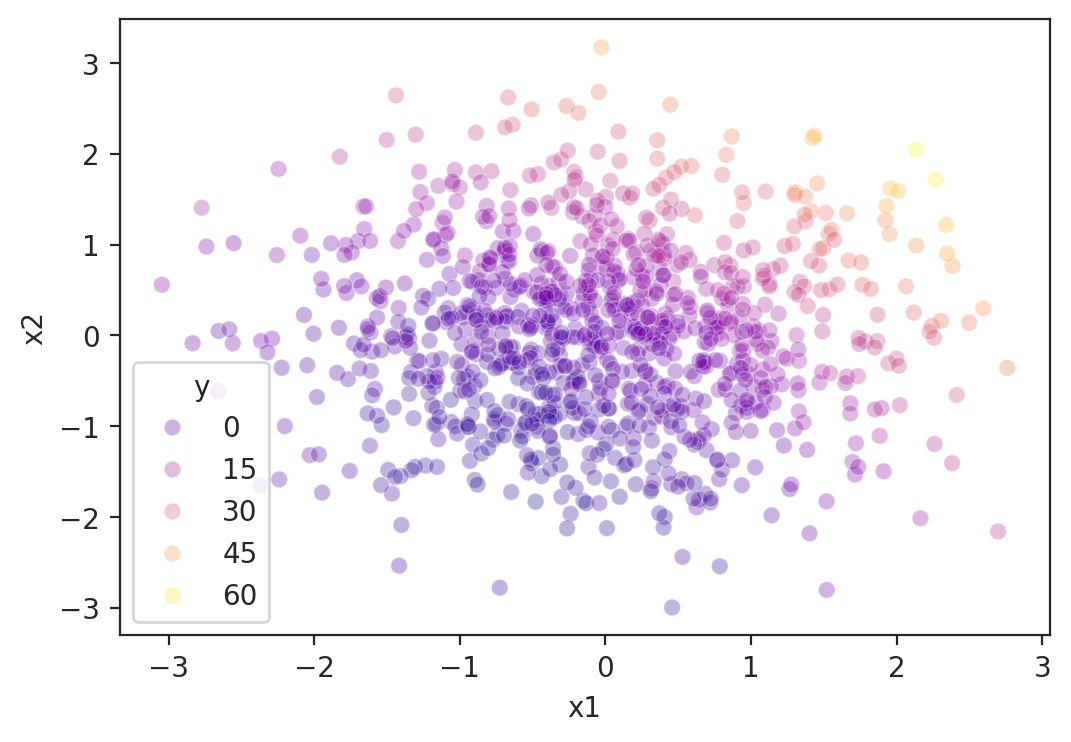

In [ ]:
sns.scatterplot(data=synth_data, x='x1', y='x2', alpha=0.3, hue='y', palette='plasma');
# 3D plots for numeric data with colour encoding the target
# a contour plot might do a better job visually for allowing to pick up
# on any possible interactions of x1 and x2

## The Linear Models

In [ ]:
X, y = synth_data.drop(columns='y'), synth_data['y']

In [ ]:
normal_reg = Pipeline(
    steps=[
        ('est', LinearRegression())
    ]
)

In [ ]:
normal_reg.fit(X, y)

Pipeline(steps=[('est', LinearRegression())])

In [ ]:
eval_results = cross_validate(
    normal_reg, X, y, cv=5,
    scoring='neg_mean_absolute_error',
    return_train_score=True
)

In [ ]:
-eval_results['test_score'].mean(), eval_results['test_score'].std()

(4.09324988891751, 0.18810342806467575)

In [ ]:
-eval_results['train_score'].mean(), eval_results['train_score'].std()

(4.045536339982105, 0.053764157606065344)

In [ ]:
normal_reg['est'].coef_

array([ 6.96637705,  9.22817564, -0.2610917 ])

In [ ]:
X.columns

Index(['x1', 'x2', 'x3'], dtype='object')

In [ ]:
from sklearn.metrics import PredictionErrorDisplay

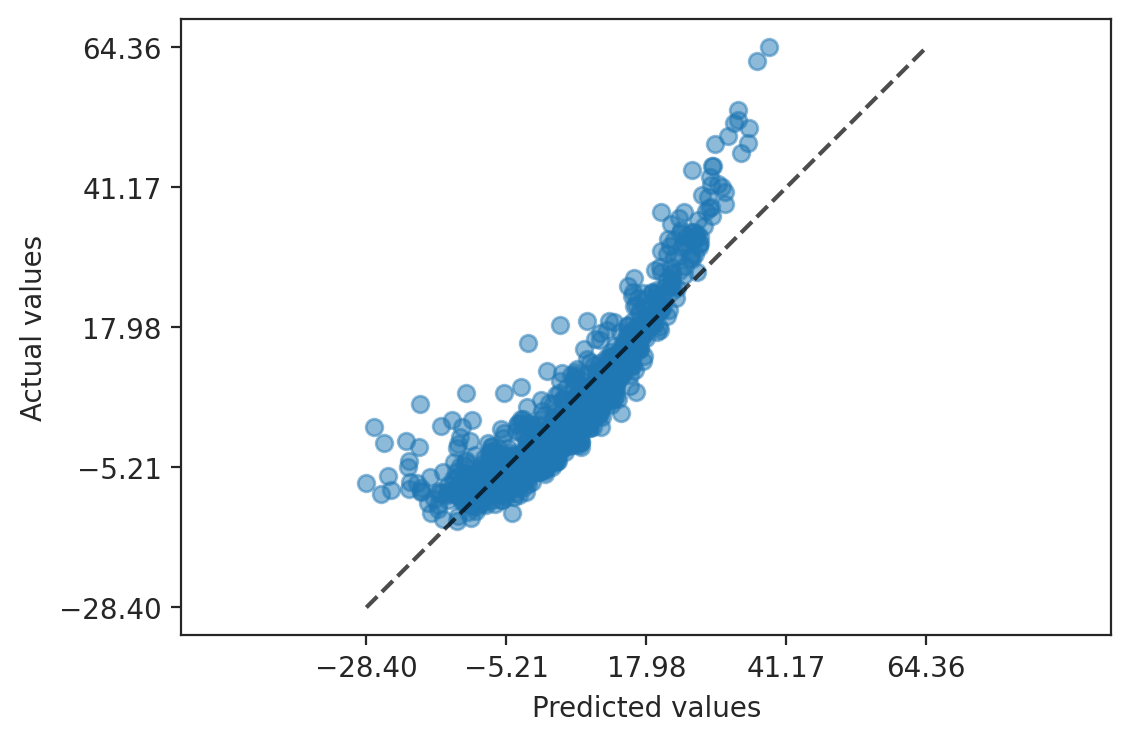

In [ ]:
PredictionErrorDisplay.from_estimator(
    normal_reg, X, y, kind="actual_vs_predicted", scatter_kwargs=dict(alpha=0.5)
);

In [ ]:
poly_reg = Pipeline(
    steps=[
        ('poly', PolynomialFeatures(2, include_bias=False)),
        ('est', LinearRegression())
    ]
)

In [ ]:
poly_reg.fit(X, y)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('est', LinearRegression())])

In [ ]:
eval_results = cross_validate(
    poly_reg, X, y, cv=5,
    scoring='neg_mean_absolute_error',
    return_train_score=True
)

In [ ]:
-eval_results['test_score'].mean(), eval_results['test_score'].std()

(1.6232407673368328, 0.021587420305387288)

In [ ]:
-eval_results['train_score'].mean(), eval_results['train_score'].std()

(1.6110347145711514, 0.005857531181793502)

In [ ]:
poly_reg['est'].coef_

array([ 7.02596189e+00,  9.02577412e+00,  3.98918724e-02,  3.02326703e+00,
        2.01847626e+00,  2.75527208e-02,  2.01428278e+00, -1.36853523e-01,
        2.98739128e-03])

In [ ]:
poly_reg['poly'].get_feature_names_out()

array(['x1', 'x2', 'x3', 'x1^2', 'x1 x2', 'x1 x3', 'x2^2', 'x2 x3',
       'x3^2'], dtype=object)

In [ ]:
pd.DataFrame(
    dict(
        feat=poly_reg['poly'].get_feature_names_out(),
        coef=poly_reg['est'].coef_
    ),
)

,feat,coef
0,x1,7.025962
1,x2,9.025774
2,x3,0.039892
3,x1^2,3.023267
4,x1 x2,2.018476
5,x1 x3,0.027553
6,x2^2,2.014283
7,x2 x3,-0.136854
8,x3^2,0.002987


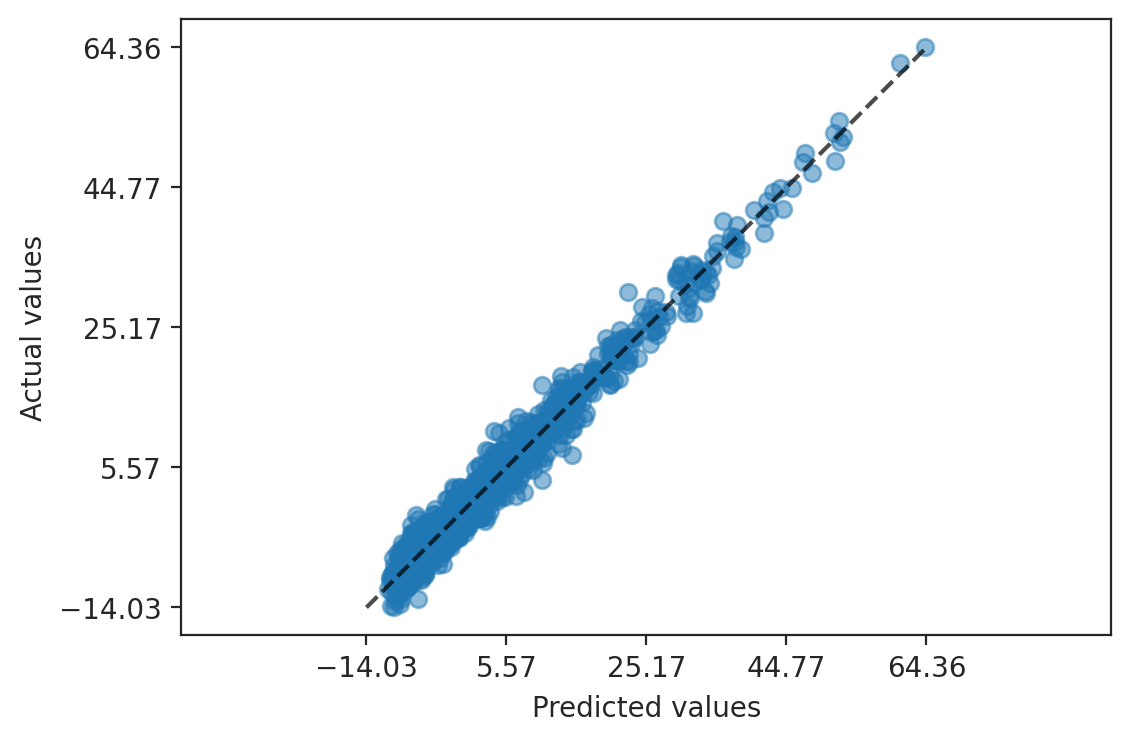

In [ ]:
PredictionErrorDisplay.from_estimator(
    poly_reg, X, y, kind="actual_vs_predicted", scatter_kwargs=dict(alpha=0.5)
);

## What is the Data Generation Procedure?

In [ ]:
n = 1000
np.random.seed(0)
x1 = np.random.normal(0, 1, n)
x2 = np.random.normal(0, 1, n)
x3 = np.random.normal(0, 1, n)  # non informative feature
y = 3*(x1**2) + 2*x1*x2 + 2*(x2**2) + 7*(x1) + 9*(x2) + np.random.normal(0, 2, n)
# Non-linear and interaction terms